<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parser" data-toc-modified-id="Parser-1">Parser</a></span><ul class="toc-item"><li><span><a href="#Exercises1" data-toc-modified-id="Exercises1-1.1">Exercises1</a></span></li><li><span><a href="#Exercises2" data-toc-modified-id="Exercises2-1.2">Exercises2</a></span></li><li><span><a href="#Exercises3" data-toc-modified-id="Exercises3-1.3">Exercises3</a></span></li><li><span><a href="#Exercises4" data-toc-modified-id="Exercises4-1.4">Exercises4</a></span></li></ul></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-2">Wordcloud</a></span></li></ul></div>

## Parser

- prase(구)가 구문적으로 더 의미 있는 정보를 담고 있다.

In [1]:
sentence = "The little bear saw the fine fat trout in the book"

In [1]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [3]:
tagged = pos_tag(word_tokenize(sentence))

In [4]:
tagged

[('The', 'DT'),
 ('little', 'JJ'),
 ('bear', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('fine', 'JJ'),
 ('fat', 'NN'),
 ('trout', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('book', 'NN')]

In [5]:
from nltk.help import upenn_tagset
upenn_tagset("N.*")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [2]:
from nltk.chunk.regexp import RegexpParser

In [7]:
grammar = RegexpParser("NP: {<DT>?<NN.*>}")    # NP : 명사구
parseTree = grammar.parse(tagged)
parseTree.pprint()

(S
  The/DT
  little/JJ
  (NP bear/NN)
  saw/VBD
  the/DT
  fine/JJ
  (NP fat/NN)
  (NP trout/NN)
  in/IN
  (NP the/DT book/NN))


In [8]:
parseTree.draw()

![parseTree](./images/parseTree1.png)

In [9]:
sentence = "The little yellow dog barked at the cat"

In [10]:
pos_tag(word_tokenize(sentence))

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN')]

In [11]:
parseTree = grammar.parse(pos_tag(word_tokenize(sentence)))
parseTree.draw()

![parseTree](./images/parseTree2.png)

In [12]:
tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser("""
            NP: {<DT>?<JJ.*>*<NN.*>}
""")

rules.parse(tagged).pprint()

(S
  (NP The/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [13]:
from konlpy.tag import Kkma

In [14]:
sentence = "내 친구가 잠을 많이 잔다."
tagged = Kkma().pos(sentence)
tagged

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [15]:
rules = RegexpParser("""
        NP: {<N.*>+<J.*>}
        VP: {<M.*>?<VV.*><E.*>}
""")

In [16]:
rules.parse(tagged).pprint()

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)


In [17]:
rules.parse(tagged).draw()

![parseTree](./images/parseTree3.png)

In [18]:
parseTree = rules.parse(tagged)
type(parseTree)

nltk.tree.Tree

In [19]:
for subTree in parseTree.subtrees():
    print(subTree)

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)
(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)
(VP 많이/MAG 자/VV ㄴ다/EFN)


In [20]:
for subTree in parseTree.subtrees():
    if subTree.label() == "NP":
        print(subTree)

(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)


### Exercises1

![exercises](./images/parse_exercises1.png)

In [21]:
sentence = "I shot an elephant in my pajamas"

tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser("""
        N: {<NN>}
        Det: {<PRP\$>|<D.*>}
        V: {<V.*>}
        P: {<IN>}
        NP: {<D.*><N.*>|<PRP>}
        PP: {<P><NP>}
        VP: {<V.*><.*P>}
        VP: {<VP><.*P>}
""")

rules.parse(tagged).pprint()

(S
  (NP I/PRP)
  (VP
    (VP (V shot/VBP) (NP (Det an/DT) (N elephant/NN)))
    (PP (P in/IN) (NP (Det my/PRP$) (N pajamas/NN)))))


In [22]:
rules.parse(tagged).draw()

### Exercises2

![exercises](./images/parse_exercises2.png)

In [34]:
sentence = "The dog saw a man in the park"

tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser("""
        N: {<NN>}
        Det: {<D.*>}
        V: {<V.*>}
        P: {<IN>}
        NP: {<D.*><N>$}
        PP: {<P><NP>}
        NP: {<D.*><N><PP>}
        NP: {<D.*><N>}
        VP: {<V><NP>}
""")

rules.parse(tagged).pprint()

(S
  (NP (Det The/DT) (N dog/NN))
  (VP
    (V saw/VBD)
    (NP
      (Det a/DT)
      (N man/NN)
      (PP (P in/IN) (NP (Det the/DT) (N park/NN))))))


In [35]:
rules.parse(tagged).draw()

### Exercises3

![exercises](./images/parse_exercises3.png)

In [48]:
sentence = "The angry bear chased the frightened little squirrel"

tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser("""
        N: {<NN>$}
        Det: {<PRP\$>|<D.*>}
        V: {<V.*>}
        P: {<IN>}
        Adj: {<JJ>}
        Nom: {<Adj><N>}
        N: {<NN>}
        Nom: {<N>}
        Nom: {<Adj><Nom>}
        NP: {<D.*><N.*>}
        PP: {<P><NP>}
        VP: {<V.*><.*P>}
""")

rules.parse(tagged).pprint()

(S
  (NP (Det The/DT) (Nom (Adj angry/JJ) (Nom (N bear/NN))))
  (VP
    (V chased/VBD)
    (NP
      (Det the/DT)
      (Nom (Adj frightened/JJ) (Nom (Adj little/JJ) (N squirrel/NN))))))


In [49]:
rules.parse(tagged).draw()

### Exercises4

![exercises](./images/parse_exercises4.png)

In [17]:
sentence = "The little bear saw the fine fat trout in the brook"

tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser("""
        Adj: <JJ>{<NN>}<NN>
        Adj: {<JJ>}
        N: {<NN>}
        Det: {<PRP\$>|<D.*>}
        V: {<V.*>}
        P: {<IN>}
        Nom: {<Adj>*<N>*}
        NP: {<D.*><N.*>}
        PP: {<P><NP>}
        VP: {<V.*><.*P>}
        VP: {<VP><.*P>}
""")

rules.parse(tagged).pprint()

(S
  (NP (Det The/DT) (Nom (Adj little/JJ) (N bear/NN)))
  (VP
    (VP
      (V saw/VBD)
      (NP (Det the/DT) (Nom (Adj fine/JJ) (Adj fat/NN) (N trout/NN))))
    (PP (P in/IN) (NP (Det the/DT) (Nom (N brook/NN))))))


In [18]:
rules.parse(tagged).draw()

## Wordcloud

In [207]:
#!pip install wordcloud

In [209]:
from konlpy.corpus import kolaw
from konlpy.tag import Kkma

In [210]:
corpus = kolaw.open(kolaw.fileids()[0]).read()
tagged = Kkma().pos(corpus)

In [211]:
tagged

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM'),
 ('건립', 'NNG'),
 ('되', 'XSV'),
 ('ㄴ', 'ETD'),
 ('대한민국', 'NNG'),
 ('임시', 'NNG'),
 ('정부', 'NNG'),
 ('의', 'JKG'),
 ('법통', 'NNG'),
 ('과', 'JC'),
 ('불의', 'NNG'),
 ('에', 'JKM'),
 ('항거', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('4', 'NR'),
 ('·', 'SP'),
 ('19', 'NR'),
 ('민주', 'NNG'),
 ('이념', 'NNG'),
 ('을', 'JKO'),
 ('계승', 'NNG'),
 ('하', 'XSV'),
 ('고', 'ECE'),
 (',', 'SP'),
 ('조국', 'NNG'),
 ('의', 'JKG'),
 ('민주', 'NNG'),
 ('개혁', 'NNG'),
 ('과', 'JKM'),
 ('평화적', 'NNG'),
 ('통일', 'NNG'),
 ('의', 'JKG'),
 ('사명', 'NNG'),
 ('에', 'JKM'),
 ('입각', 'NNG'),
 ('하', 'XSV'),
 ('여', 'ECS'),
 ('정의', 'NNG'),
 ('·', 'SP'),
 ('인도', 'NNG'),
 ('와', 'JC'),
 ('동포애', 'NNG'),
 ('로써', 'JKM'),
 ('민족', 'NNG'),

In [227]:
result = [_[0] for _ in tagged if len(_[0]) > 1 and not (_[1].startswith("J") or _[0].startswith("ㄴ"))]    # J* : 조사,  "L"으로 시작하는 종결어미 제외

In [228]:
len(set(result))

1086

In [229]:
from nltk import Text

In [230]:
textObj = Text(result)

In [231]:
textObj.vocab().most_common(20)

[('법률', 121),
 ('정하', 88),
 ('대통령', 84),
 ('의하', 83),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('또는', 69),
 ('국회', 55),
 ('아니하', 53),
 ('관하', 53),
 ('회의', 42),
 ('모든', 37),
 ('위하', 33),
 ('가지', 32),
 ('필요', 31),
 ('여야', 31),
 ('위원', 31),
 ('국무', 30),
 ('기타', 26)]

In [232]:
from wordcloud import WordCloud

In [234]:
termList = textObj.vocab()

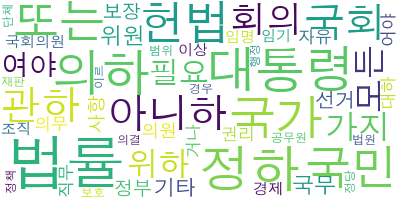

In [237]:
path = "/Libaray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=path, max_words=50, background_color="white")
wc.generate_from_frequencies(termList)
wc.to_image()

In [238]:
wc_array = wc.to_array()
type(wc_array)

numpy.ndarray

In [256]:
import os

corpus = ""

for _ in os.listdir("./naver_news/2019-03-19_13-08"):
    if _.endswith(".txt") and _.startswith("경제"):
        with open("./naver_news/2019-03-19_13-08/"+_) as f:
            corpus += f.read()

In [257]:
len(corpus)

20242

In [258]:
tagged = Kkma().nouns(corpus)

In [259]:
from collections import defaultdict
nounList = defaultdict(int)

In [260]:
for _ in tagged:
    nounList[_] += 1

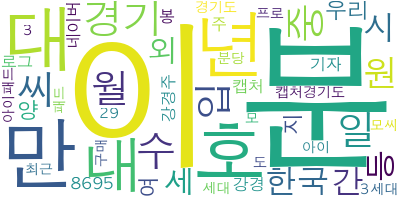

In [265]:
wc.generate_from_frequencies(nounList)
wc.to_image()